In [1]:
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
import earthpy.plot as ep

# Loss year

In [48]:
# Load data
def raster_to_df(path):
    data = rasterio.open(path)
    print(data.shape)
    data = data.read(1)
    data = np.reshape(data,-1)
    plt.figure(figsize=(2,2))
    plt.hist(data)
    plt.show()
    df = pd.DataFrame(data, columns=['value'])
    return df

(890, 974)


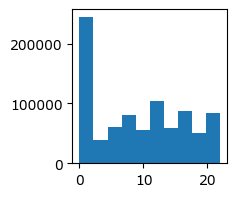

In [49]:
lossyear = raster_to_df('data/lossyear.tif')

In [70]:
# Yearly deforestation rate
lossyear = pd.DataFrame(lossyear.value_counts().sort_index(), columns=['n_pixel']).reset_index(drop=True)
lossyear['deforestation_ha'] = lossyear['n_pixel']*9
lossyear['cumulative deforestation_ha'] = lossyear['deforestation_ha']
lossyear.loc[0, 'cumulative deforestation_ha'] = 0
lossyear['cumulative deforestation_ha'] = lossyear['cumulative deforestation_ha'].cumsum()
lossyear['remaining_ha'] = 7801740 - lossyear['cumulative deforestation_ha'] # Total area = 7801740 ha
lossyear['percentage'] = round(lossyear['remaining_ha']/7801740*100, 0)
lossyear['year'] = lossyear.index + 2000
lossyear.head() 

,n_pixel,deforestation_ha,cumulative deforestation_ha,remaining_ha,percentage,year
0,205983,1853847,0,7801740,100.0,2000
1,20565,185085,185085,7616655,98.0,2001
2,18463,166167,351252,7450488,95.0,2002
3,7451,67059,418311,7383429,95.0,2003
4,31683,285147,703458,7098282,91.0,2004


In [71]:
lossyear.to_csv('data/deforestation_rate.csv')

# Carbon

(890, 974)


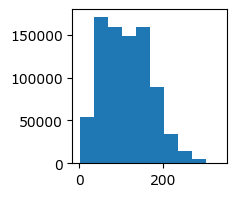

In [52]:
carbon = raster_to_df('data/carbon_t_per_ha.tif')

In [54]:
carbon.describe()

,value
count,835477.000000
mean,111.786743
std,57.046215
min,0.055556
25%,64.618332
50%,108.686668
75%,152.983337
max,335.922211


In [62]:
carbon['category'] = np.where(
    carbon['value'] <= 65, 'low', np.where(
        carbon['value'] <= 110, 'medium', np.where(
            carbon['value'] <= 155, 'upper medium', 'high'
        )
    )
)
carbon.head()

,value,category
0,72.381668,medium
1,72.381668,medium
2,88.212776,medium
3,127.714447,upper medium
4,180.763885,high


In [63]:
carbon.to_csv('data/carbon.csv')

# Emissions

(289, 315)


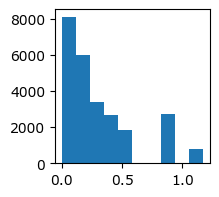

In [65]:
emissions = raster_to_df('data/peat_carbon_emission_Gg.tif')

In [66]:
emissions.describe()

,value
count,25546.000000
mean,0.315509
std,0.279045
min,0.000000
25%,0.103212
50%,0.206280
75%,0.412800
max,1.170144
